In [9]:
import json

In [10]:
with open('results_1.json', 'r') as f:
    data = json.load(f)

In [11]:
data[0]

{'train_att': [[[[239.3451385498047, 263.11090087890625, -45.379180908203125],
    [524.2542724609375, 99.79645538330078, -23.907297134399414],
    [32.283111572265625, -771.1898803710938, -177.07672119140625]],
   [[-95.57968139648438, -507.3708190917969, -185.1075439453125],
    [-187.4146728515625, -278.1759033203125, -183.74607849121094],
    [-78.91102600097656, -428.50396728515625, -177.07672119140625]],
   [[-385.43603515625, 34.726566314697266, 53.64101791381836],
    [-428.8509826660156, -278.1759033203125, -183.74607849121094],
    [-408.3255310058594, -428.50396728515625, -177.07672119140625]],
   [[-21.460905075073242, 12.96070671081543, 61.35300064086914],
    [-43.02077102661133, 132.14207458496094, -45.81471633911133],
    [-368.9552917480469, -395.0821533203125, -177.07672119140625]],
   [[-301.7182922363281, 201.74578857421875, -196.33229064941406],
    [-371.1766052246094, -239.10137939453125, -284.5766906738281],
    [-408.2401428222656, -145.573974609375, -177.07672

In [12]:
len(data[0]['train_att'][0])

3830

In [13]:
len(data)

200

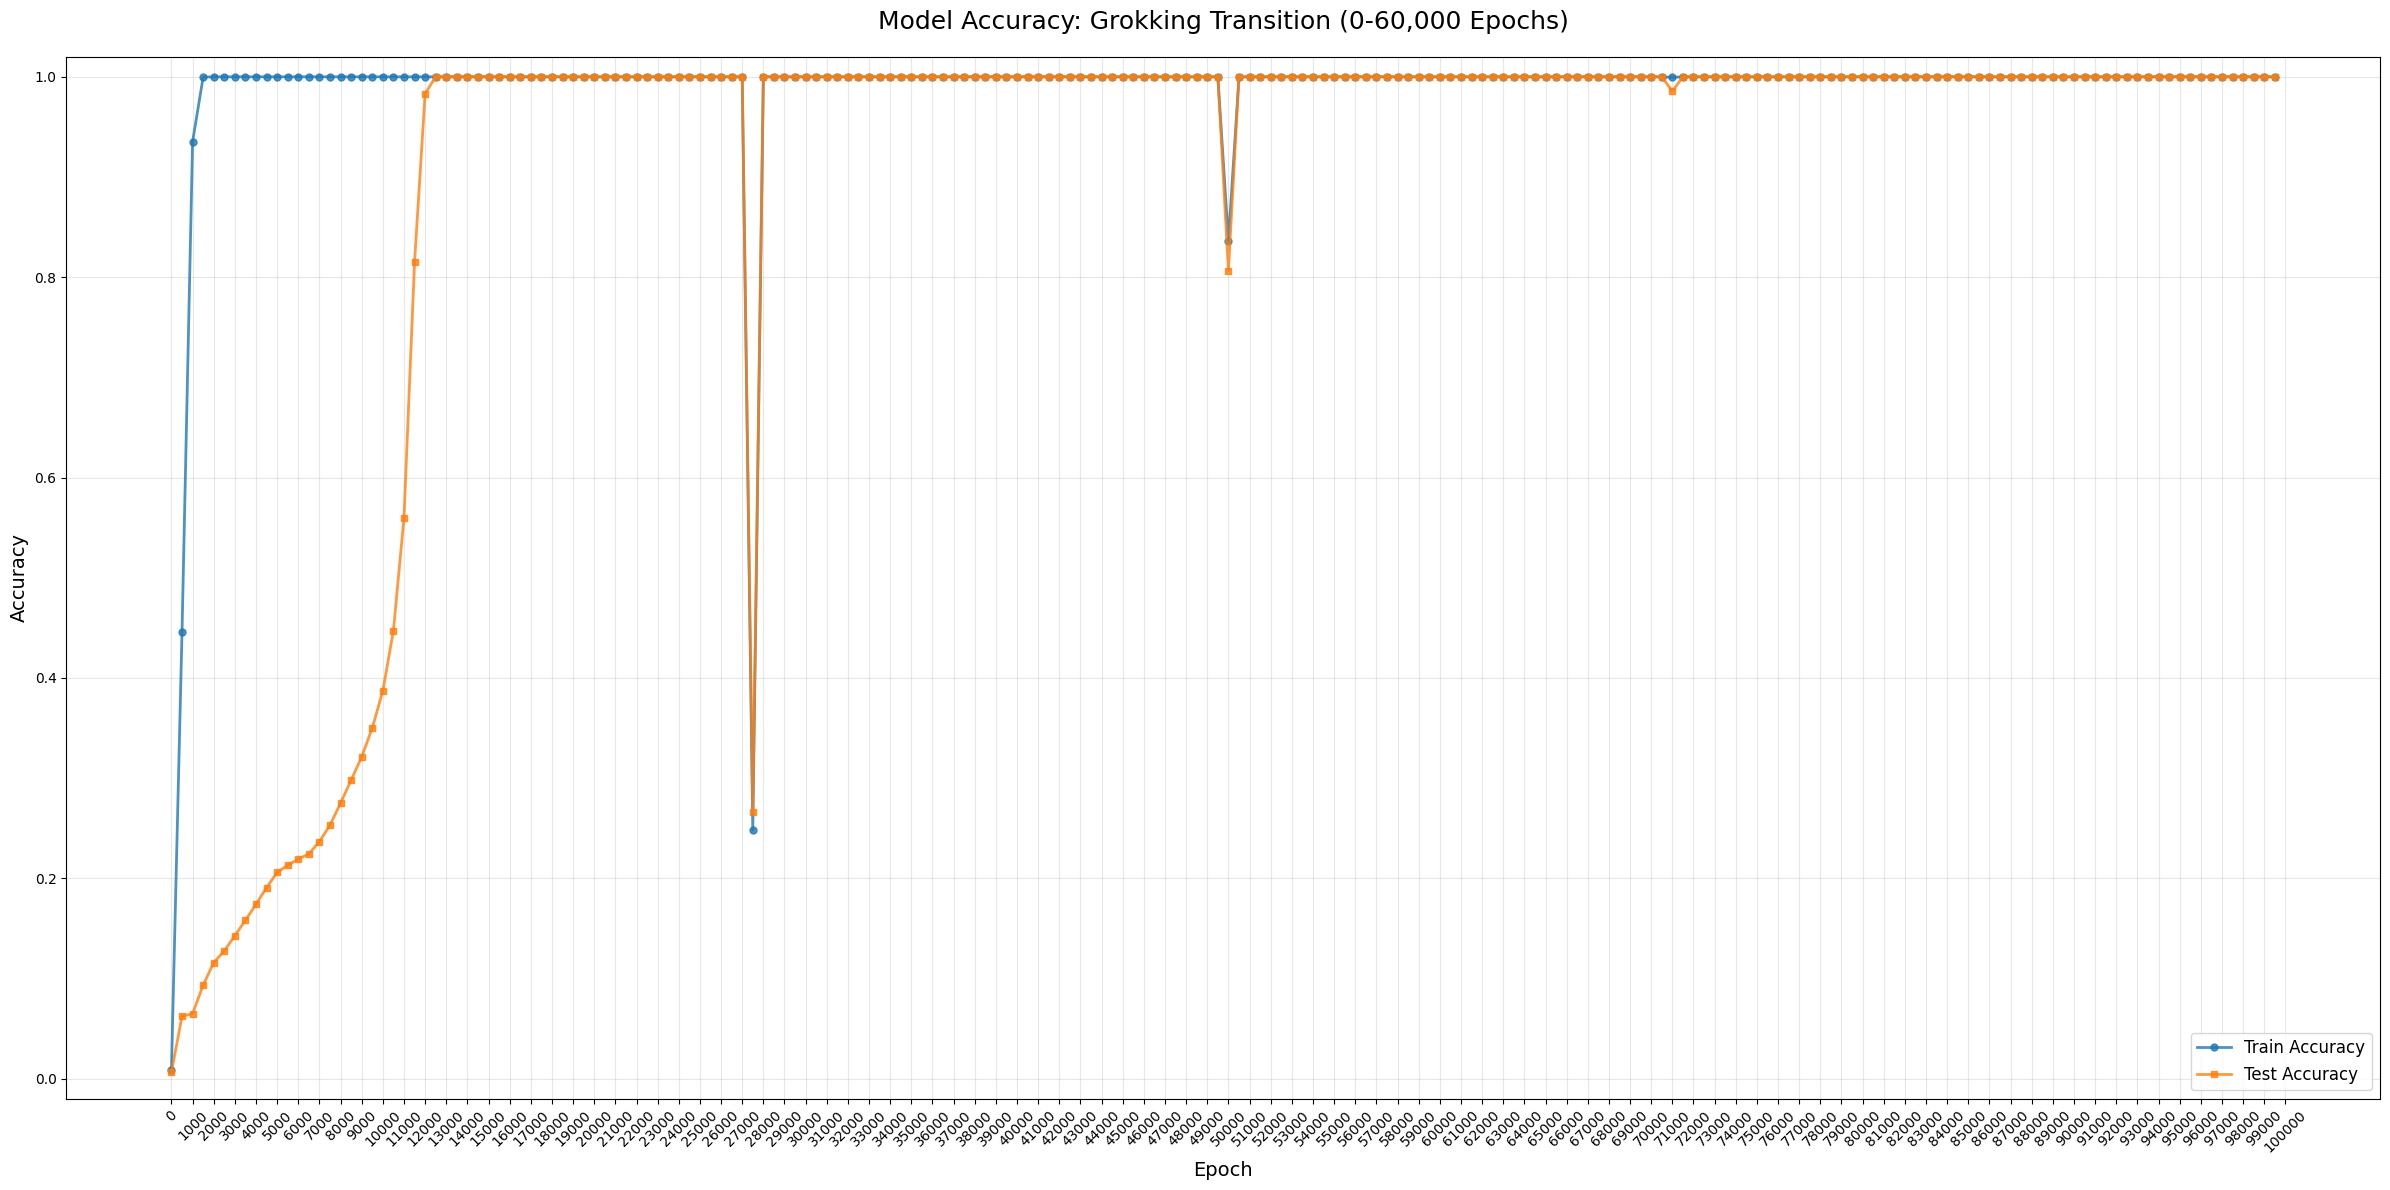

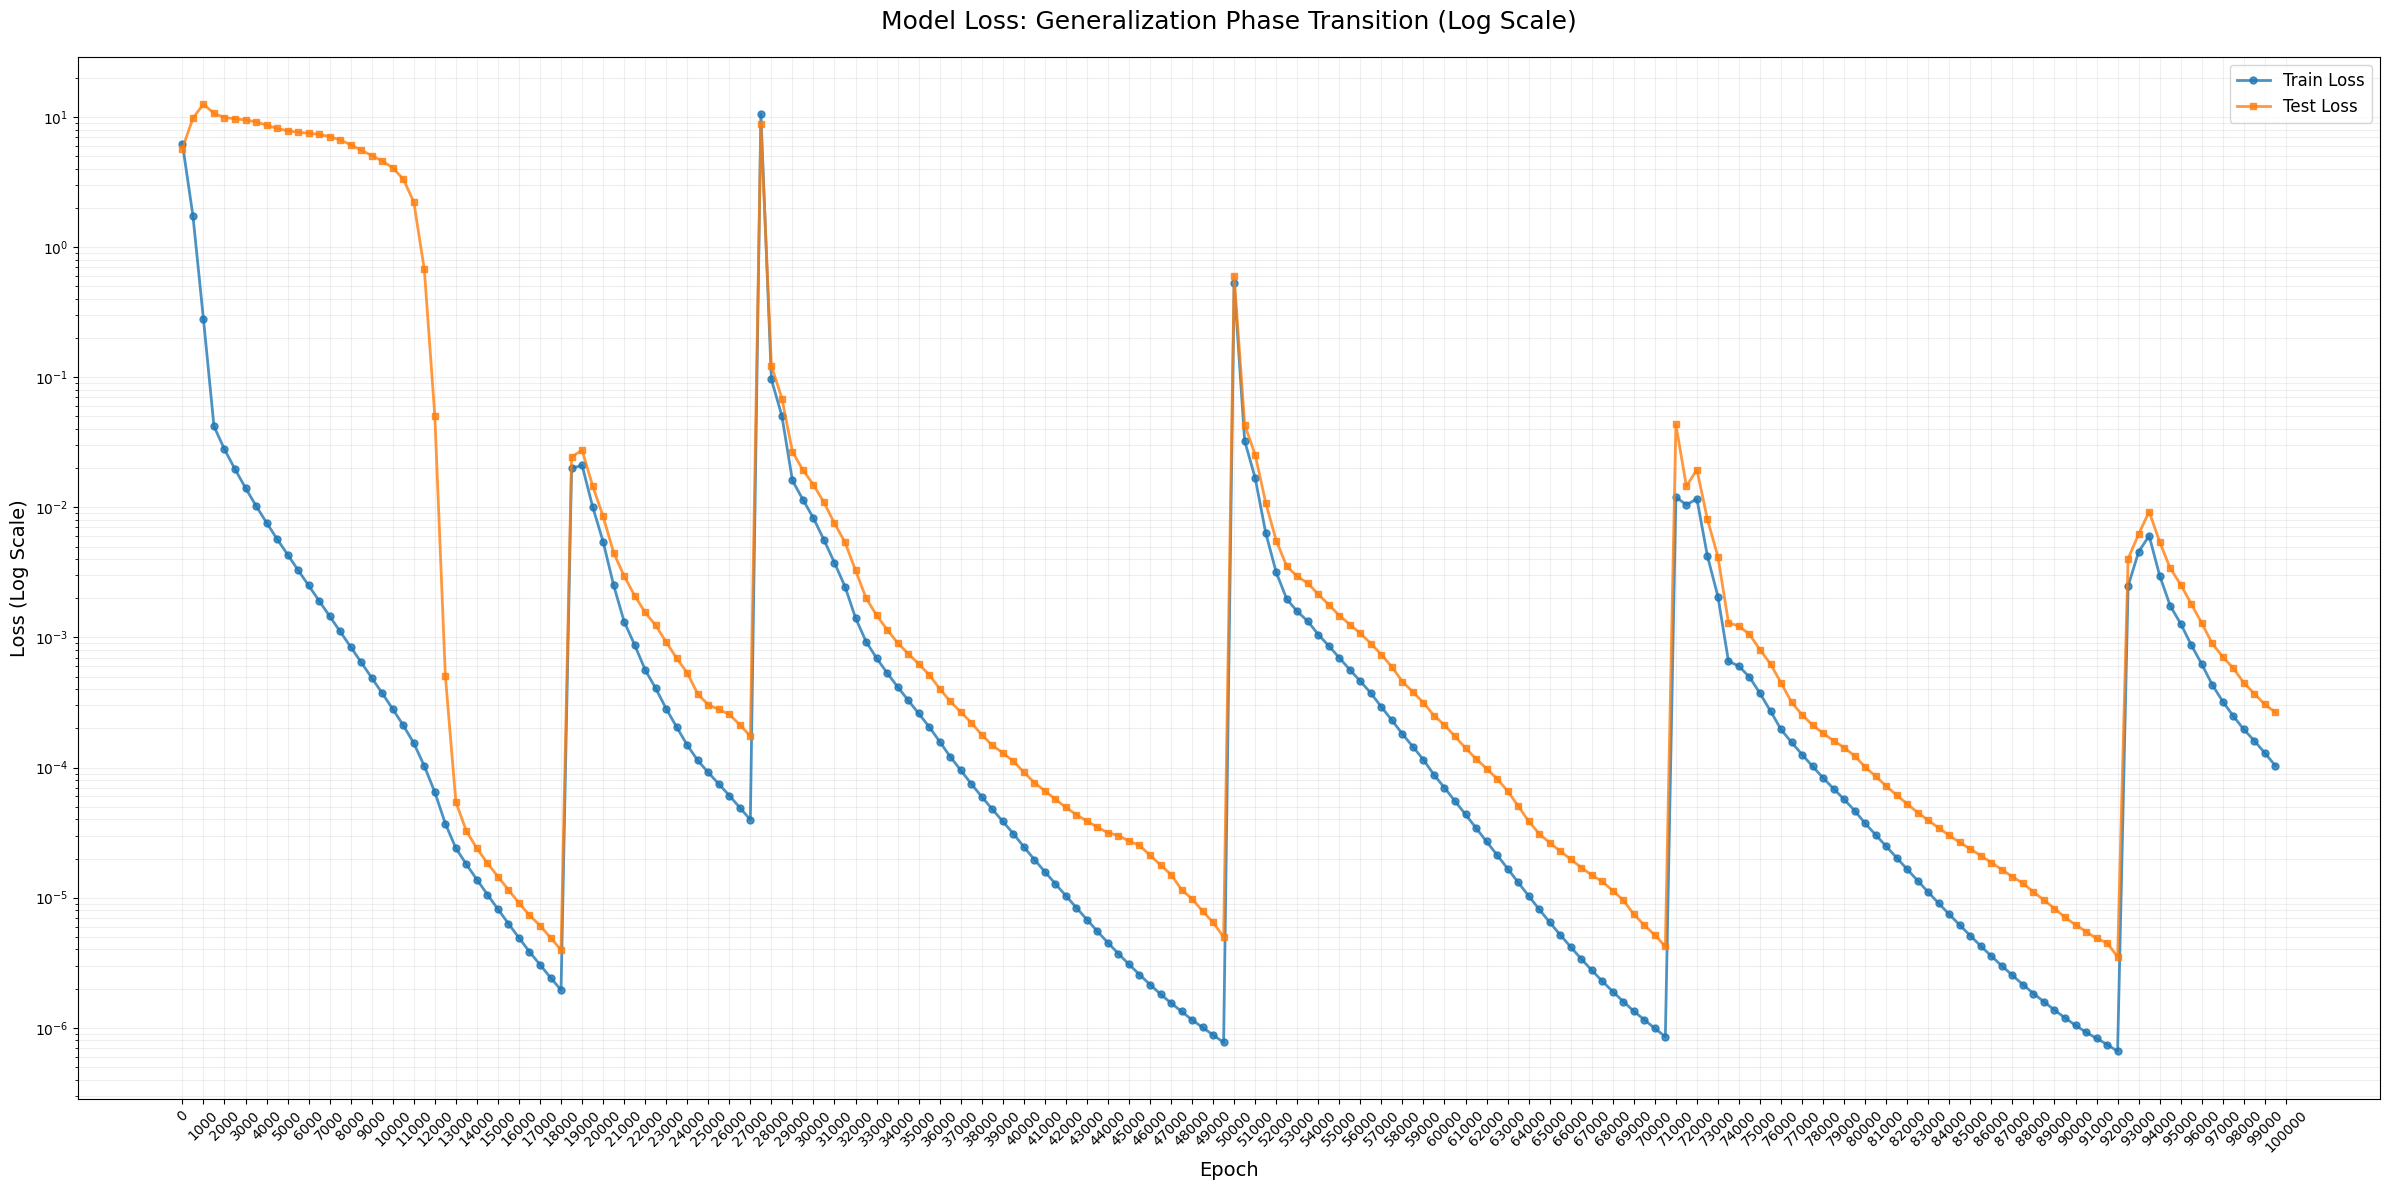

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Preparation
# Creating the X-axis based on your 500-epoch save frequency
epochs_recorded = np.arange(len(data)) * 500

# Extracting metrics (converting tensors to floats if necessary)
train_accs = np.array([v['train_acc'].item() if hasattr(v['train_acc'], 'item') else v['train_acc'] for v in data])
test_accs = np.array([v['test_acc'].item() if hasattr(v['test_acc'], 'item') else v['test_acc'] for v in data])
train_losses = np.array([v['train_loss'].item() if hasattr(v['train_loss'], 'item') else v['train_loss'] for v in data])
test_losses = np.array([v['test_loss'].item() if hasattr(v['test_loss'], 'item') else v['test_loss'] for v in data])

# Define the X-axis tick parameters
tick_spacing = 1000
xticks = np.arange(0, 100001, tick_spacing)

# ---------------------------------------------------------
# GRAPH 1: ACCURACY (Individual & Large)
# ---------------------------------------------------------
fig_acc, ax1 = plt.subplots(figsize=(24, 12))  # Increased size for better clarity

ax1.plot(epochs_recorded, train_accs, label='Train Accuracy', color='#1f77b4', 
         linestyle='-', marker='o', markersize=5, alpha=0.8, linewidth=2)
ax1.plot(epochs_recorded, test_accs, label='Test Accuracy', color='#ff7f0e', 
         linestyle='-', marker='s', markersize=5, alpha=0.8, linewidth=2)

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks, rotation=45, fontsize=10)
ax1.set_title('Model Accuracy: Grokking Transition (0-60,000 Epochs)', fontsize=18, pad=20)
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_ylim(-0.02, 1.02)
ax1.legend(fontsize=12, loc='lower right')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('grokking_accuracy_large_1.png', dpi=300, bbox_inches='tight')

# ---------------------------------------------------------
# GRAPH 2: LOSS (Individual & Large)
# ---------------------------------------------------------
fig_loss, ax2 = plt.subplots(figsize=(24, 12))  # Increased size for better clarity

ax2.plot(epochs_recorded, train_losses, label='Train Loss', color='#1f77b4', 
         marker='o', markersize=5, alpha=0.8, linewidth=2)
ax2.plot(epochs_recorded, test_losses, label='Test Loss', color='#ff7f0e', 
         marker='s', markersize=5, alpha=0.8, linewidth=2)

ax2.set_yscale('log')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks, rotation=45, fontsize=10)
ax2.set_title('Model Loss: Generalization Phase Transition (Log Scale)', fontsize=18, pad=20)
ax2.set_xlabel('Epoch', fontsize=14)
ax2.set_ylabel('Loss (Log Scale)', fontsize=14)
ax2.legend(fontsize=12, loc='upper right')
ax2.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.savefig('grokking_loss_large_1.png', dpi=300, bbox_inches='tight')

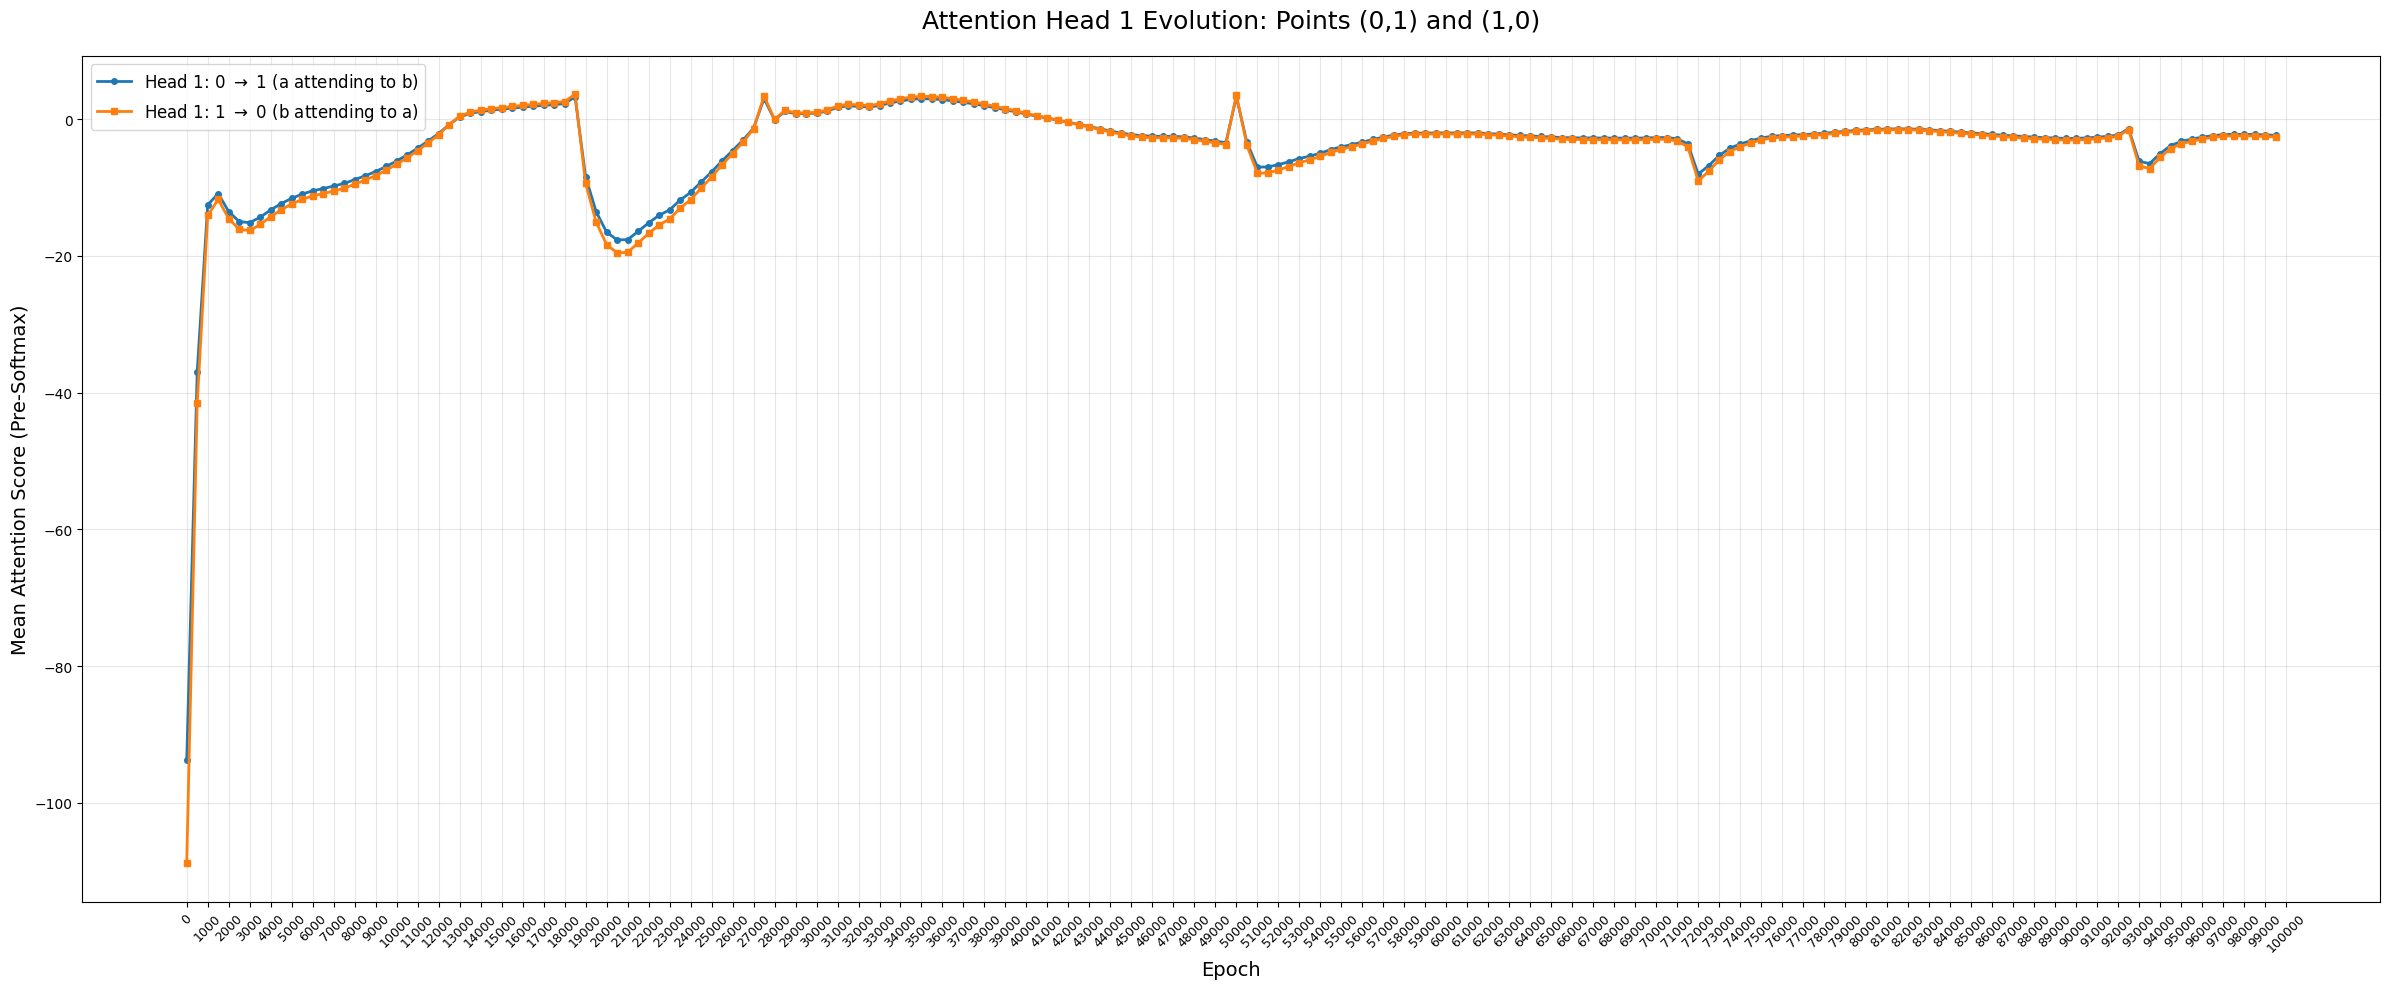

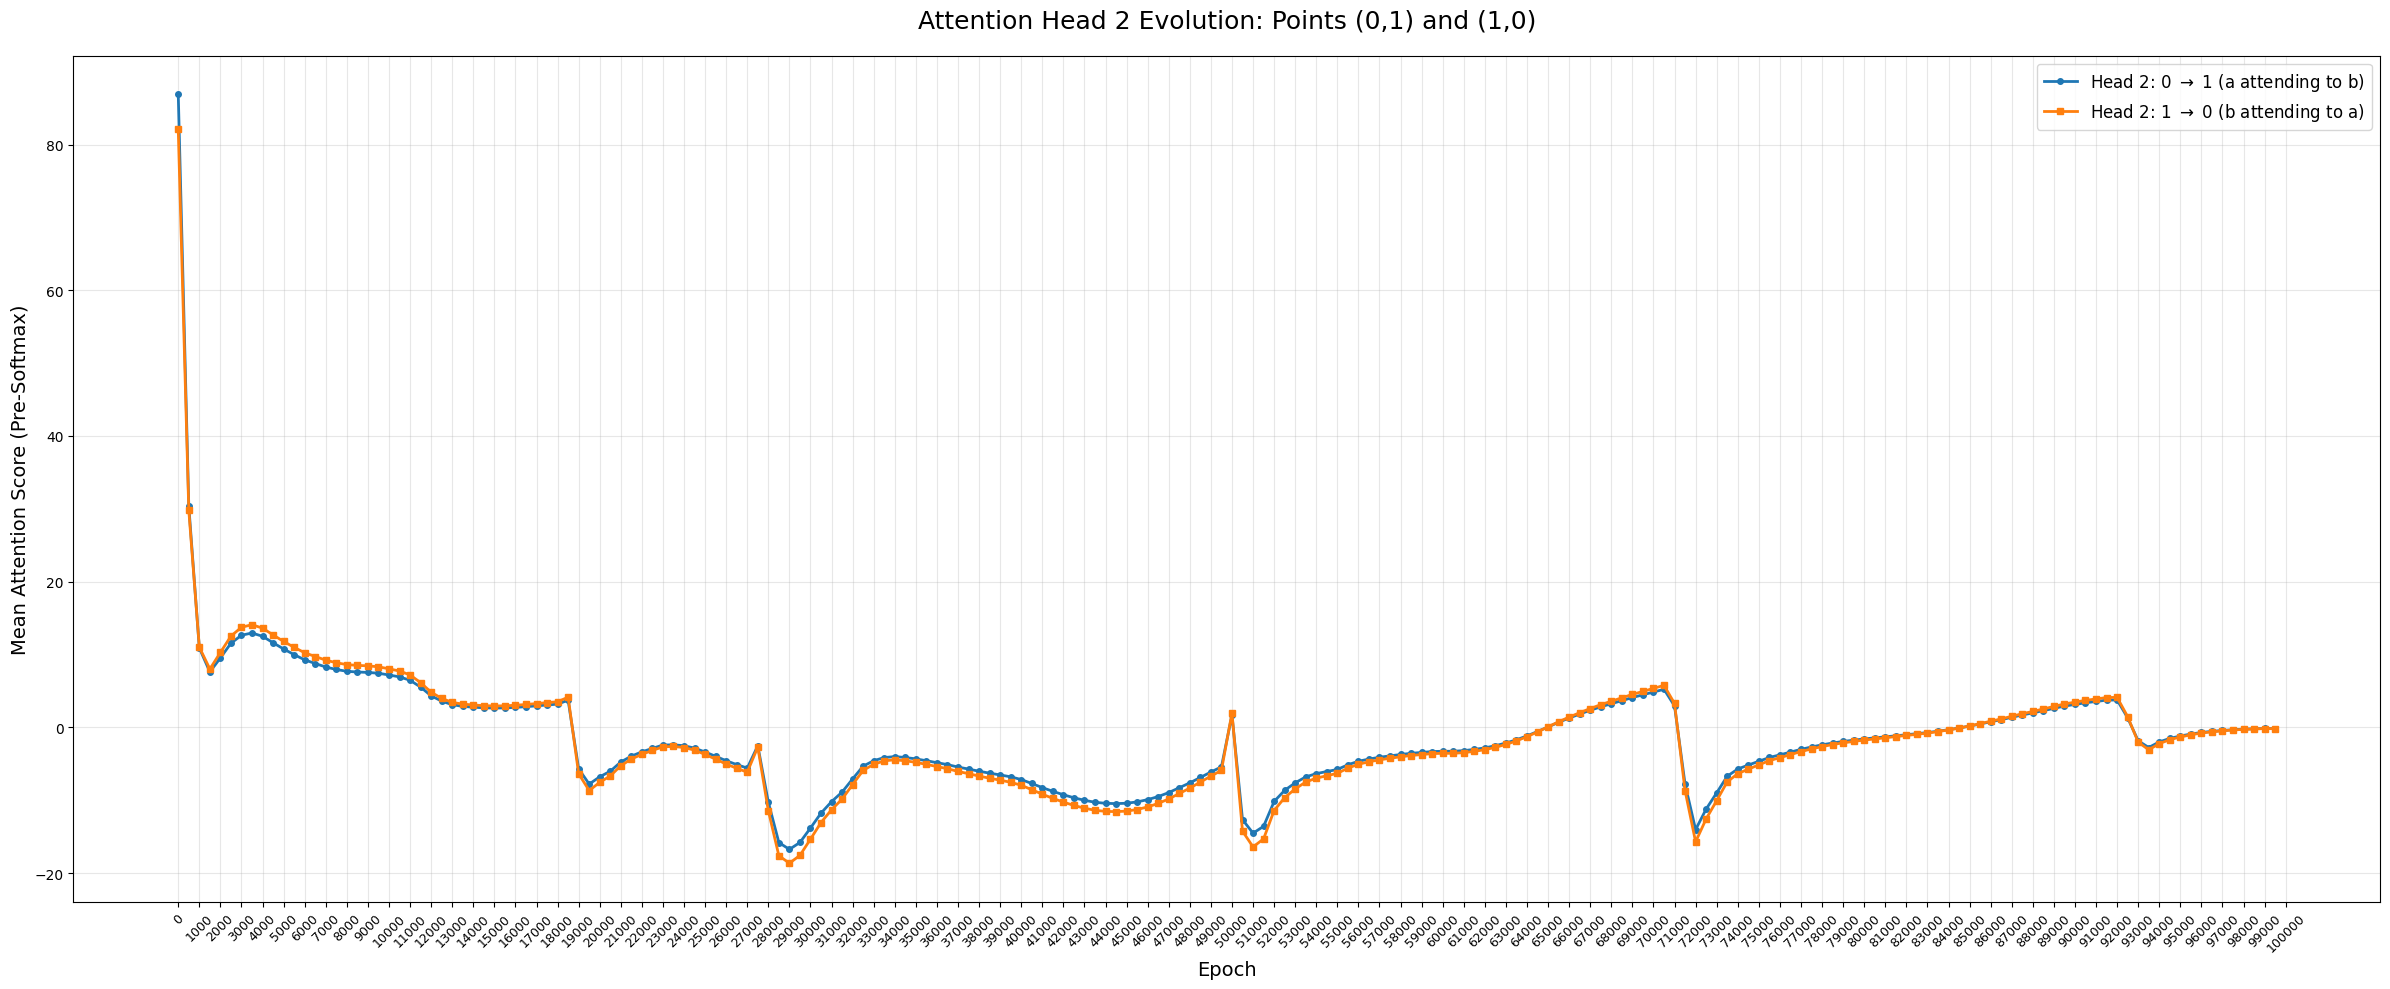

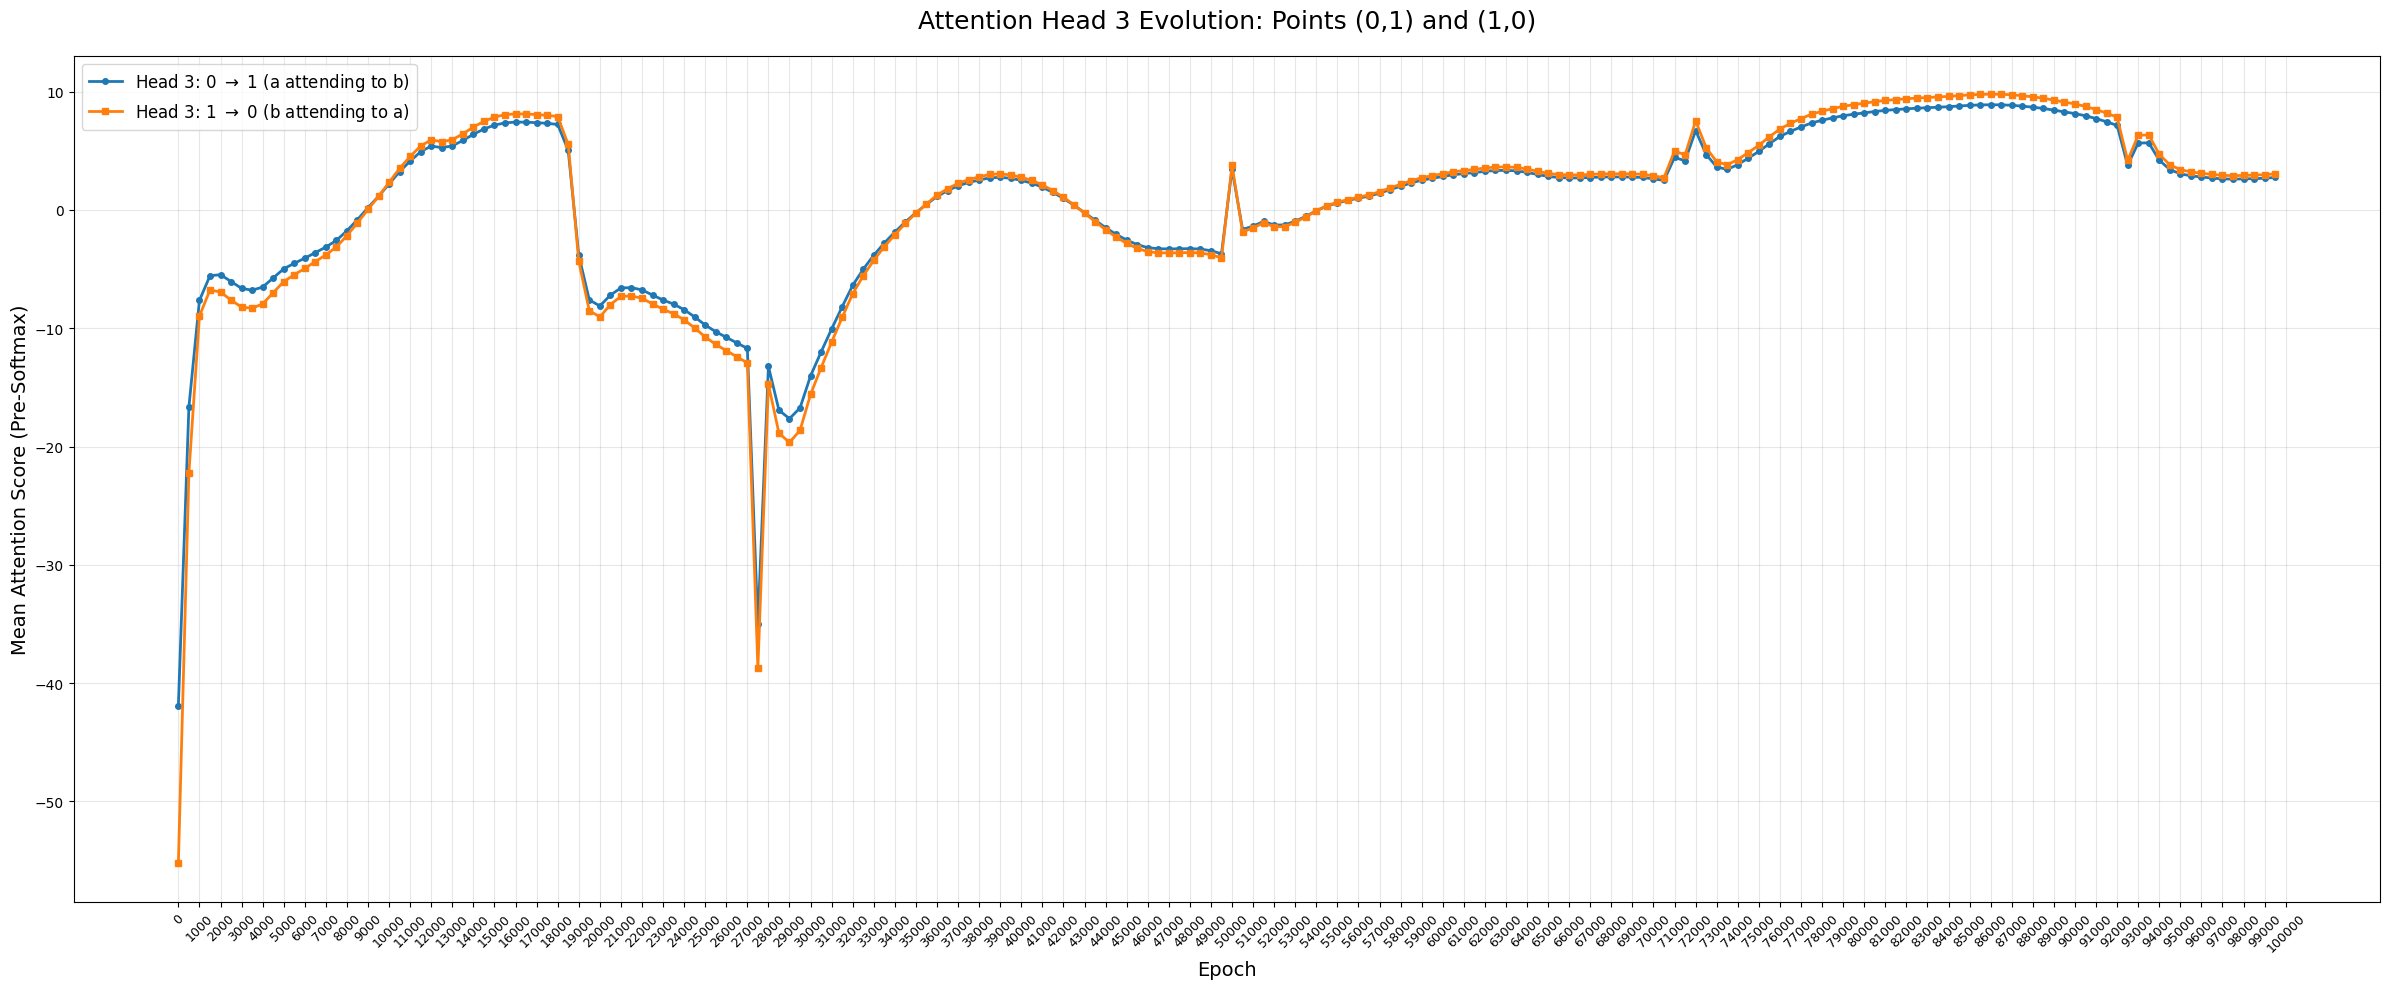

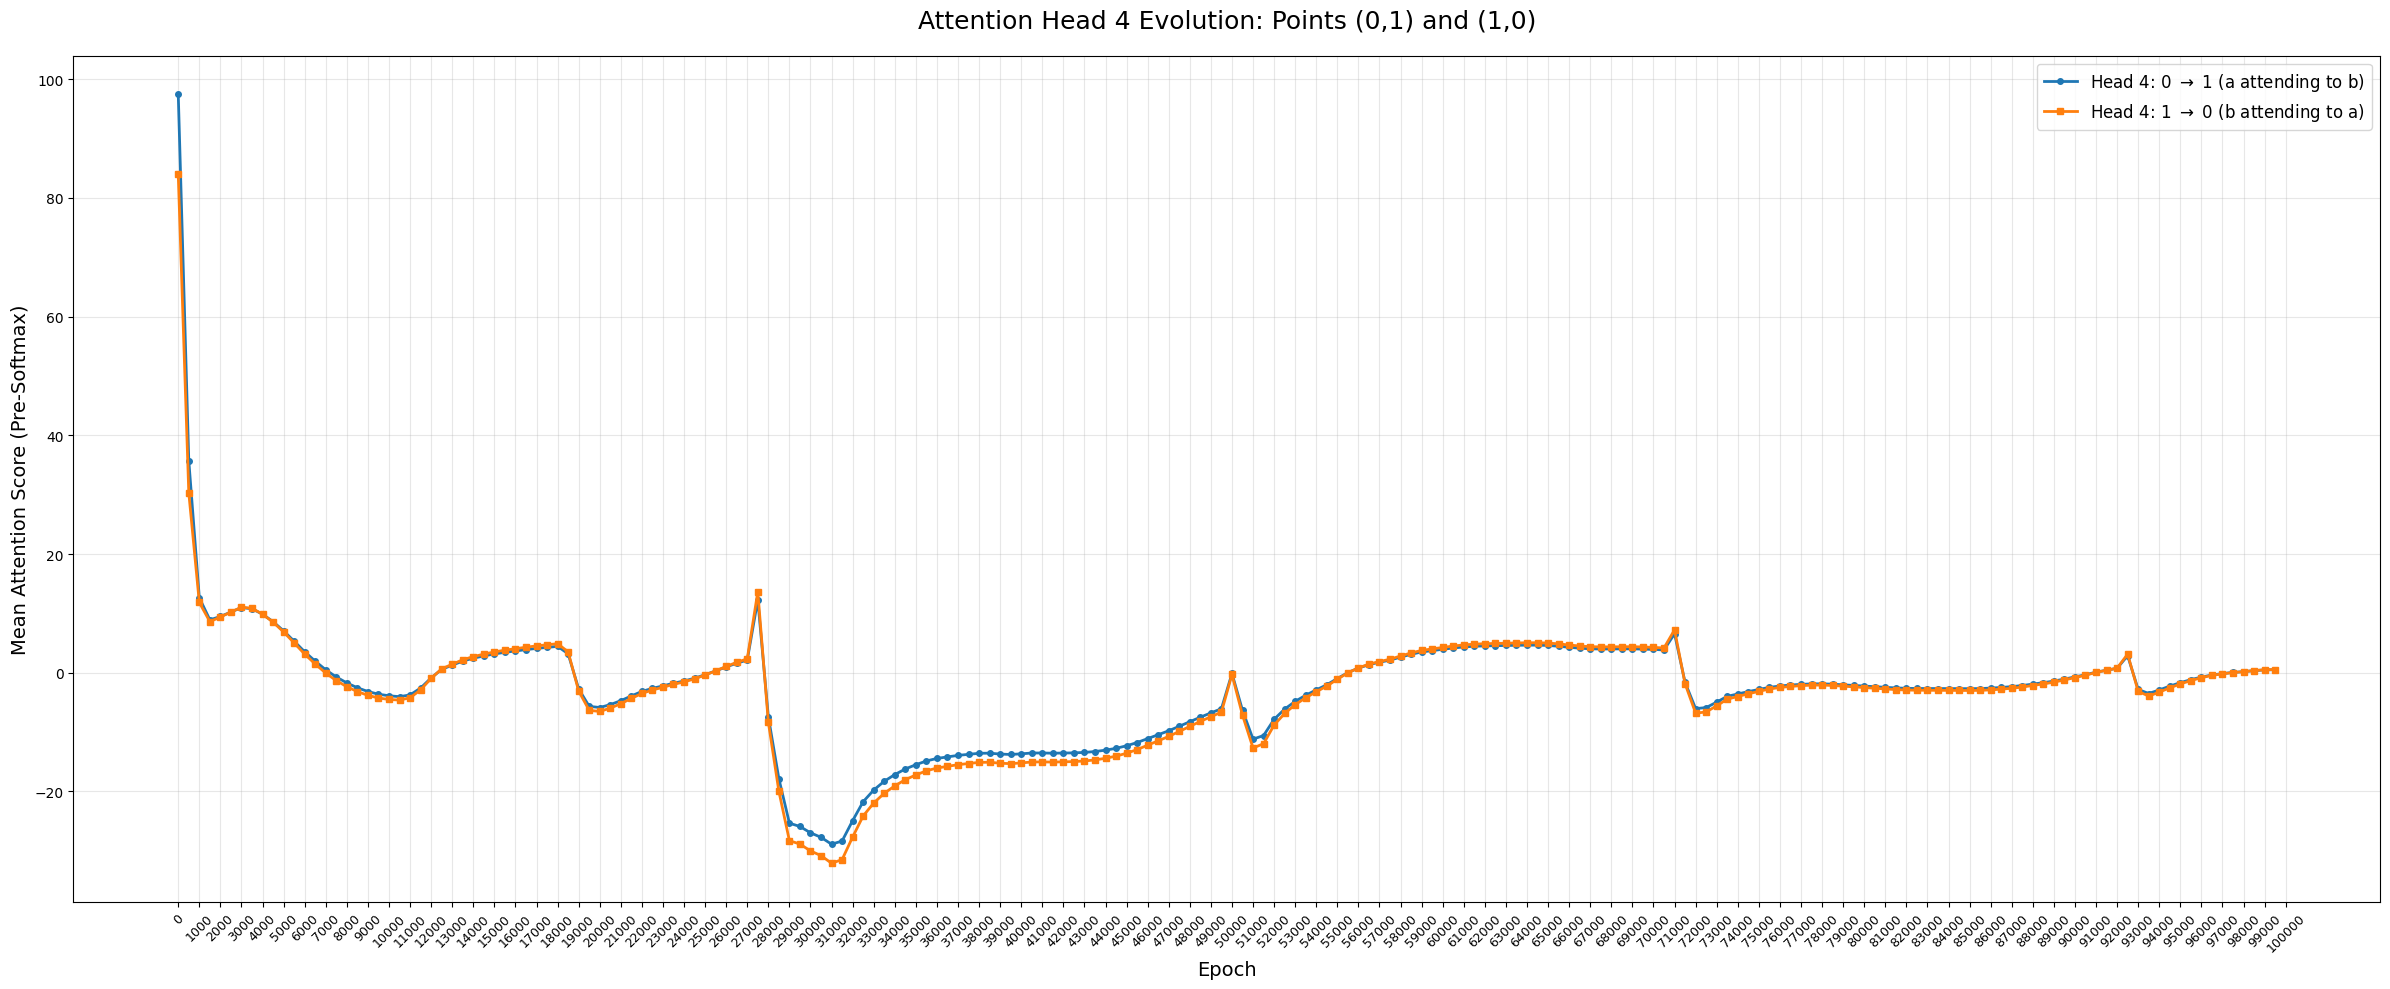

In [22]:
import torch

# 1. Prepare the Data
epochs_recorded = np.arange(len(data)) * 500
num_heads = 4

# Initialize storage for the points (0,1) and (1,0) for each head
# Shape: [num_heads, num_epochs_recorded]
att_01 = np.zeros((num_heads, len(data)))
att_10 = np.zeros((num_heads, len(data)))

for i, entry in enumerate(data):
    # entry['train_att'] is a list of 4 tensors: [att1, att2, att3, att4]
    # Each tensor shape: [Batch, 3, 3]
    for h in range(num_heads):
        head_data = entry['train_att'][h]
        head_tensor = torch.as_tensor(head_data)
        # Take the mean across the batch for the specific indices
        att_01[h, i] = head_tensor[:, 0, 1].mean().item()
        att_10[h, i] = head_tensor[:, 1, 0].mean().item()

# 2. Plotting parameters
tick_spacing = 1000
xticks = np.arange(0, 100001, tick_spacing)

# 3. Generate 4 separate large graphs
for h in range(num_heads):
    fig, ax = plt.subplots(figsize=(24, 10))
    
    # Plotting both attention directions with natural curves
    ax.plot(epochs_recorded, att_01[h], label=f'Head {h+1}: 0 $\\to$ 1 (a attending to b)', 
            color='#1f77b4', linestyle='-', marker='o', markersize=4, linewidth=2)
    ax.plot(epochs_recorded, att_10[h], label=f'Head {h+1}: 1 $\\to$ 0 (b attending to a)', 
            color='#ff7f0e', linestyle='-', marker='s', markersize=4, linewidth=2)
    
    # Formatting
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, rotation=45, fontsize=9)
    ax.set_title(f'Attention Head {h+1} Evolution: Points (0,1) and (1,0)', fontsize=18, pad=20)
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('Mean Attention Score (Pre-Softmax)', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    # Save each head individually
    plt.savefig(f'head_{h+1}_evolution_a_b_1.png', dpi=300, bbox_inches='tight')
    plt.show()

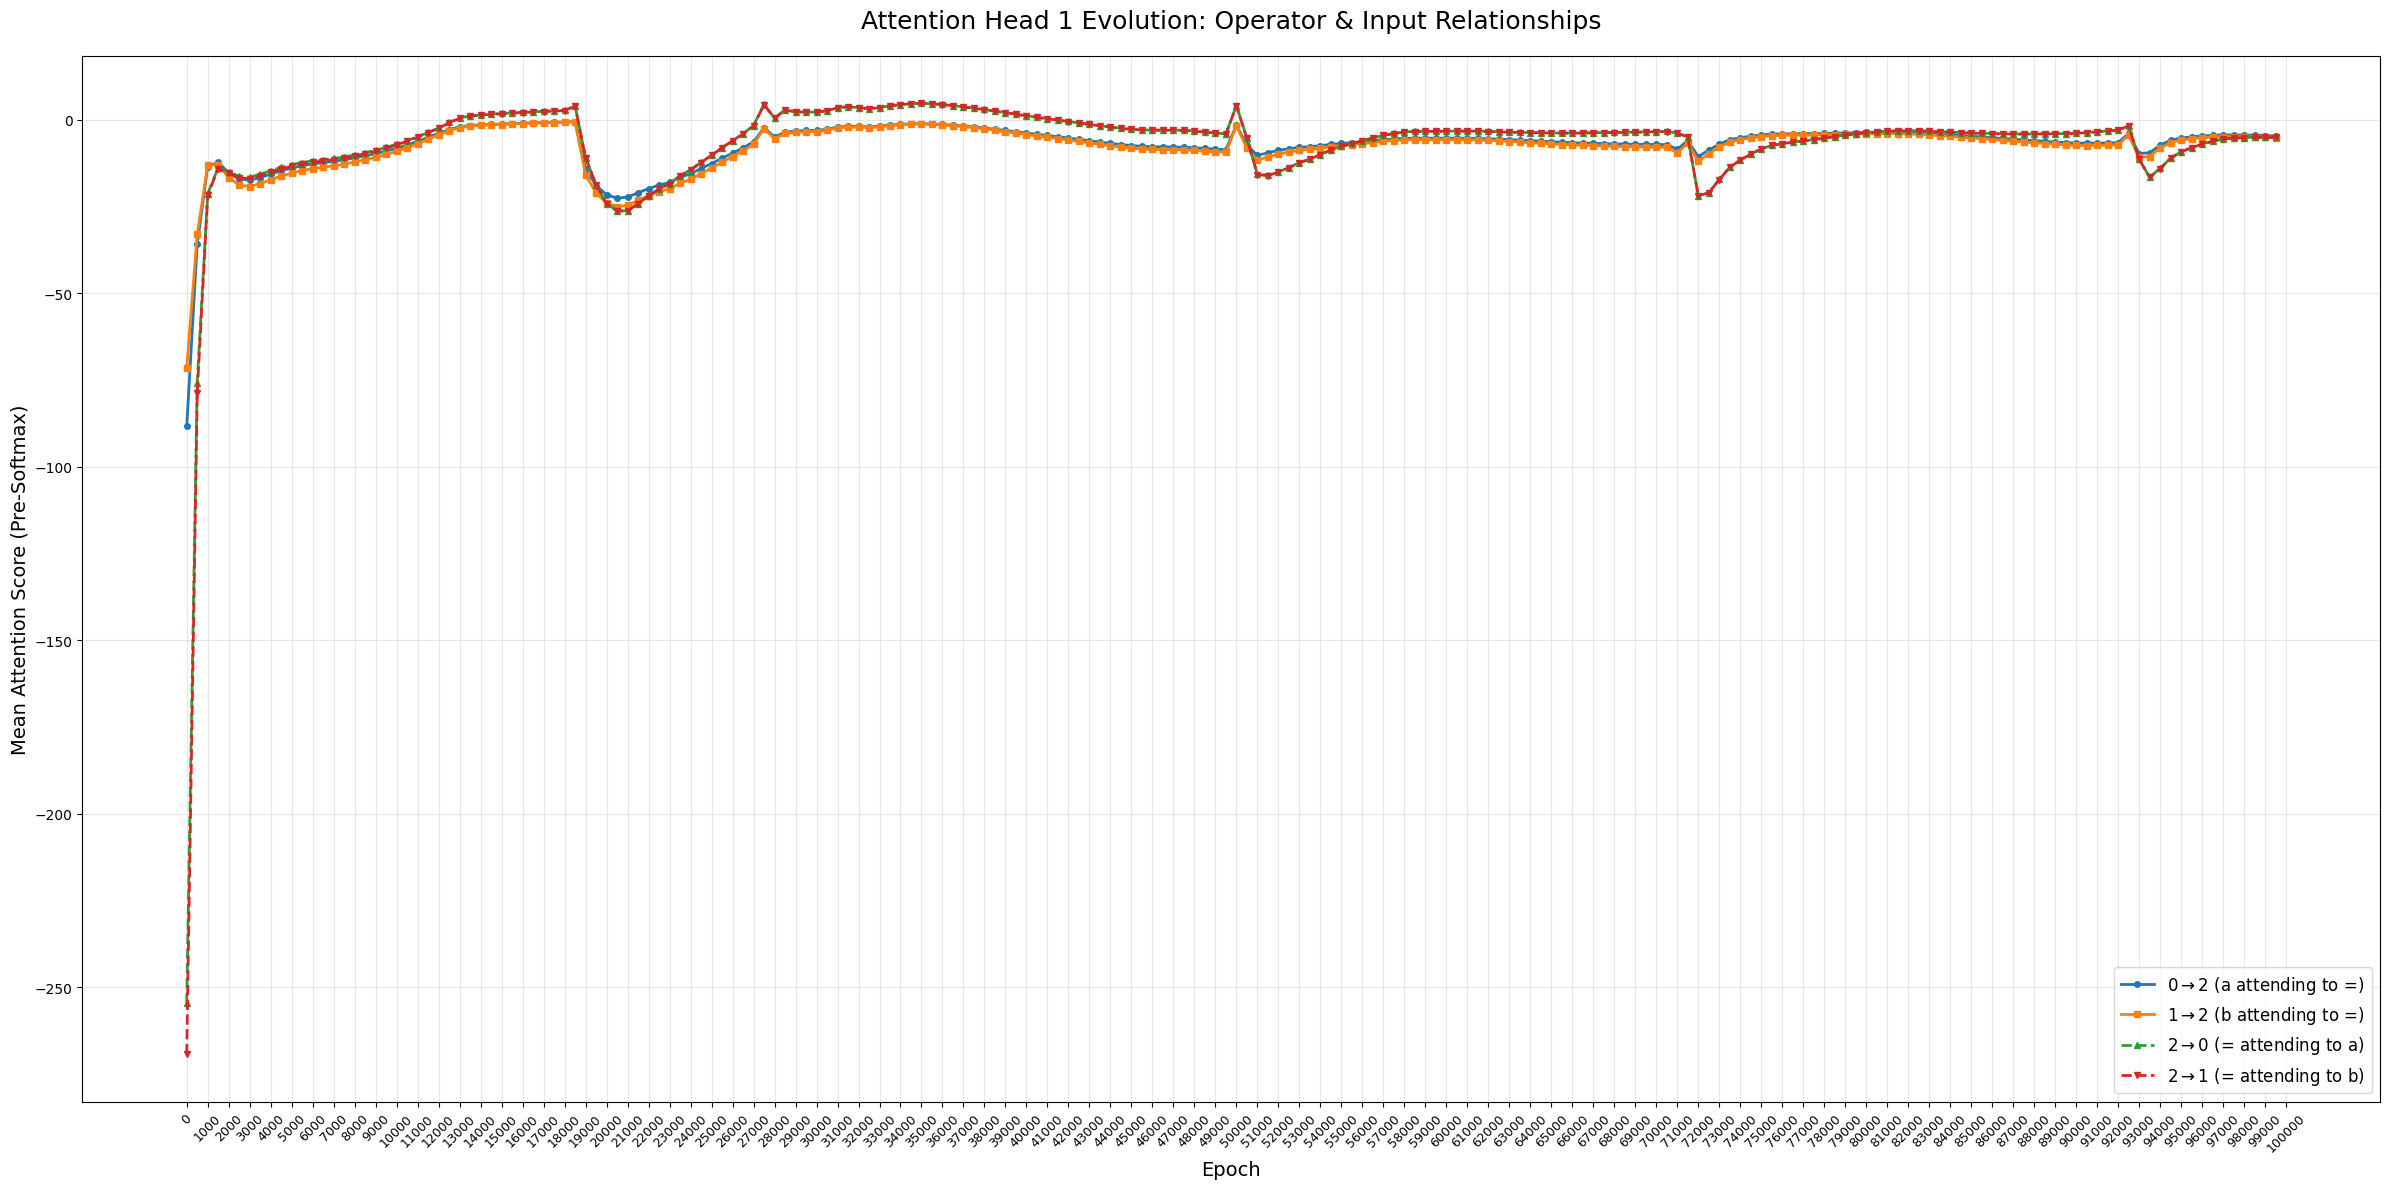

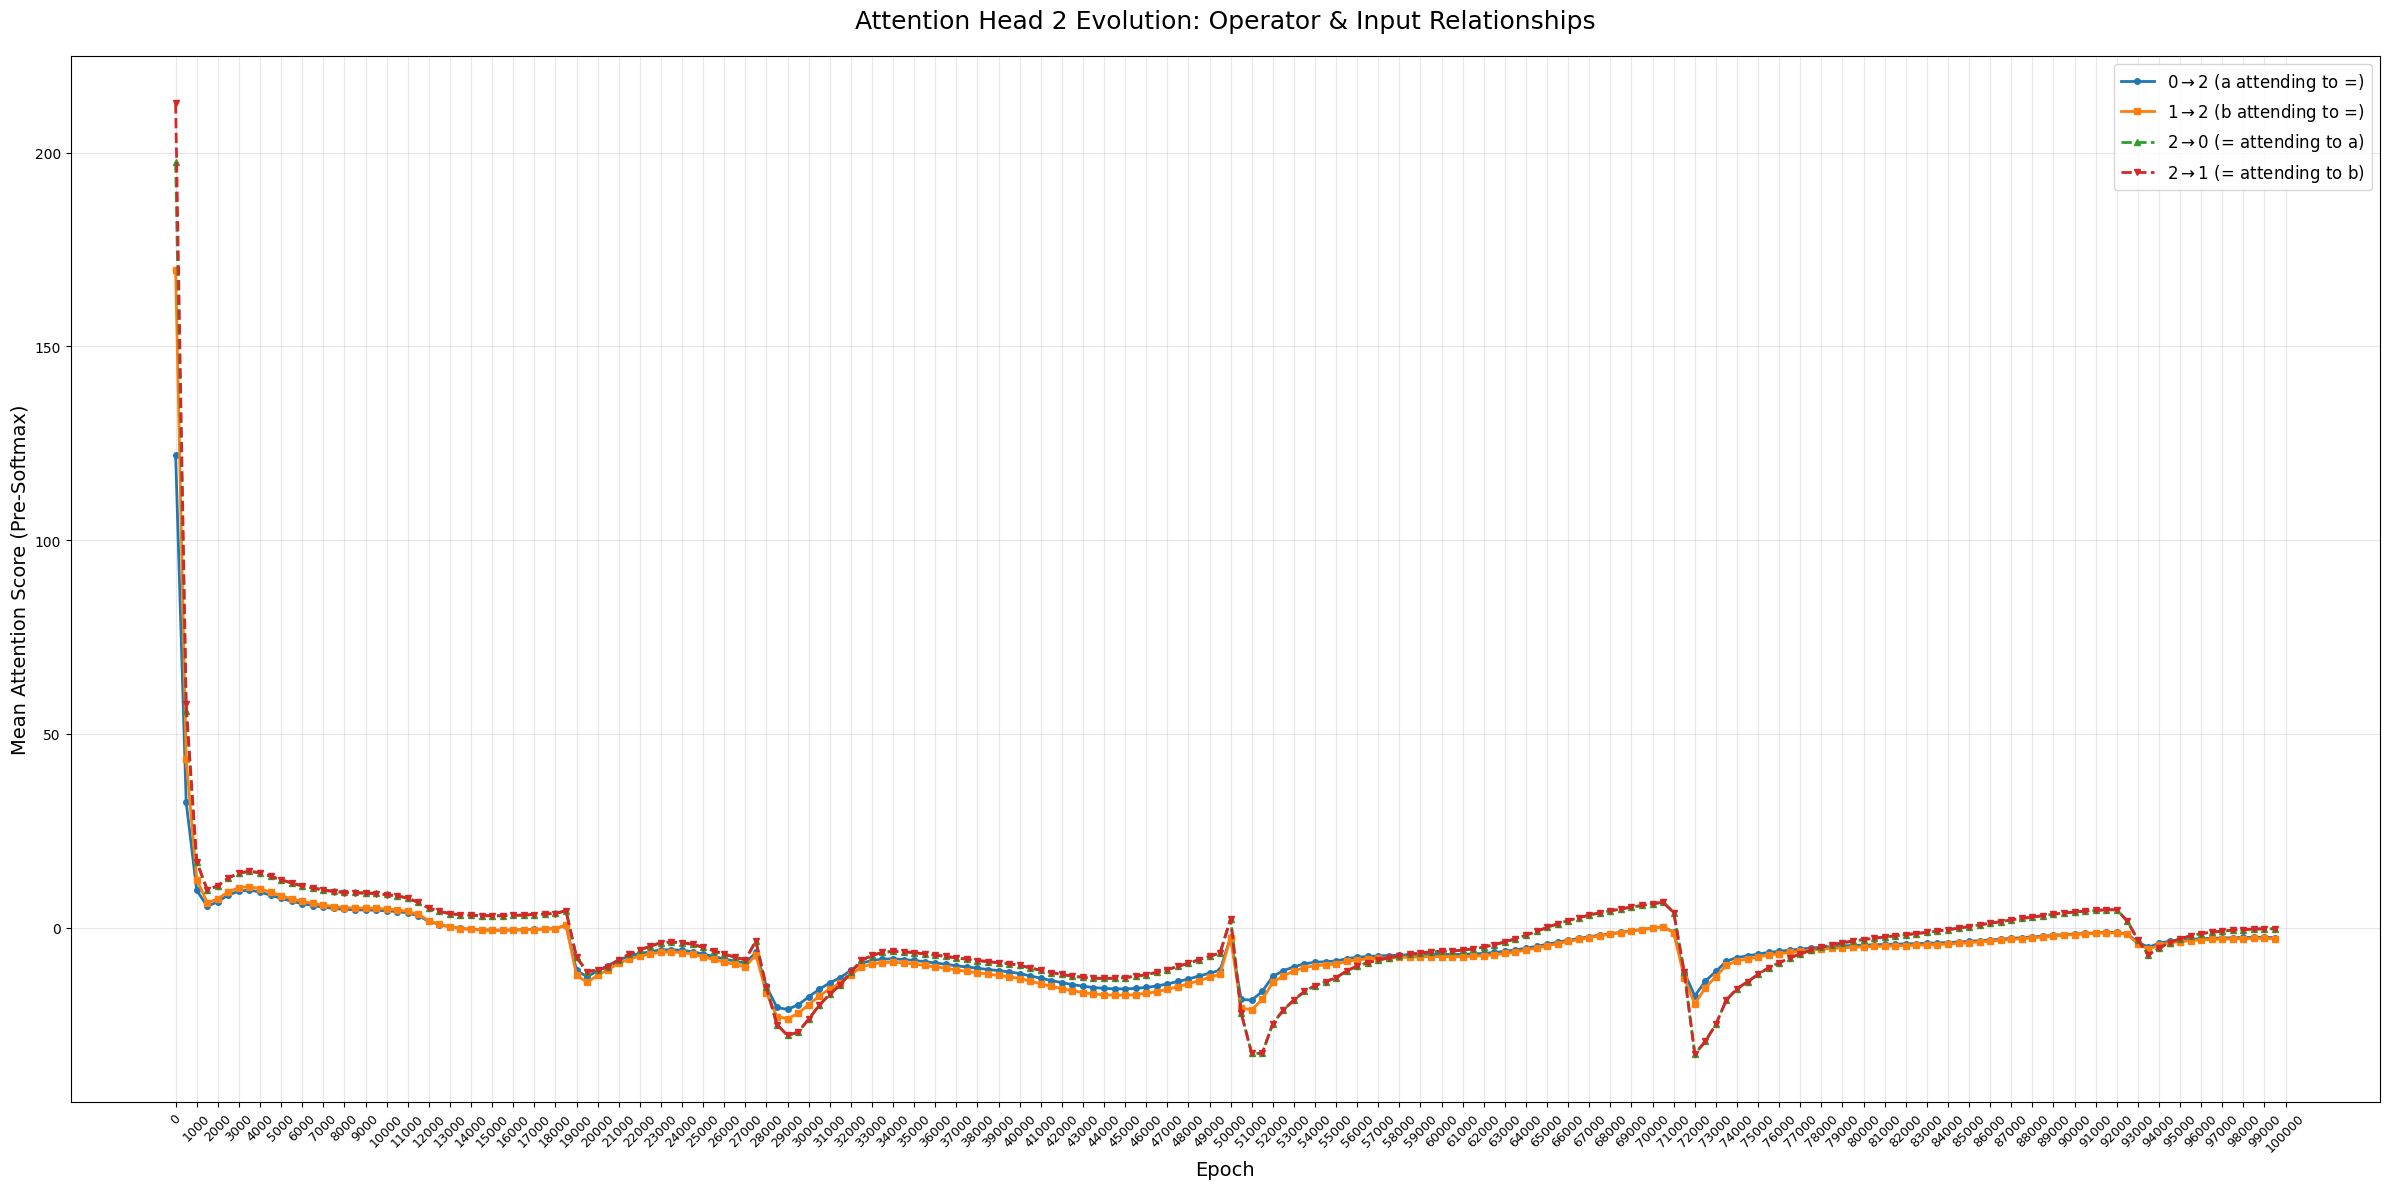

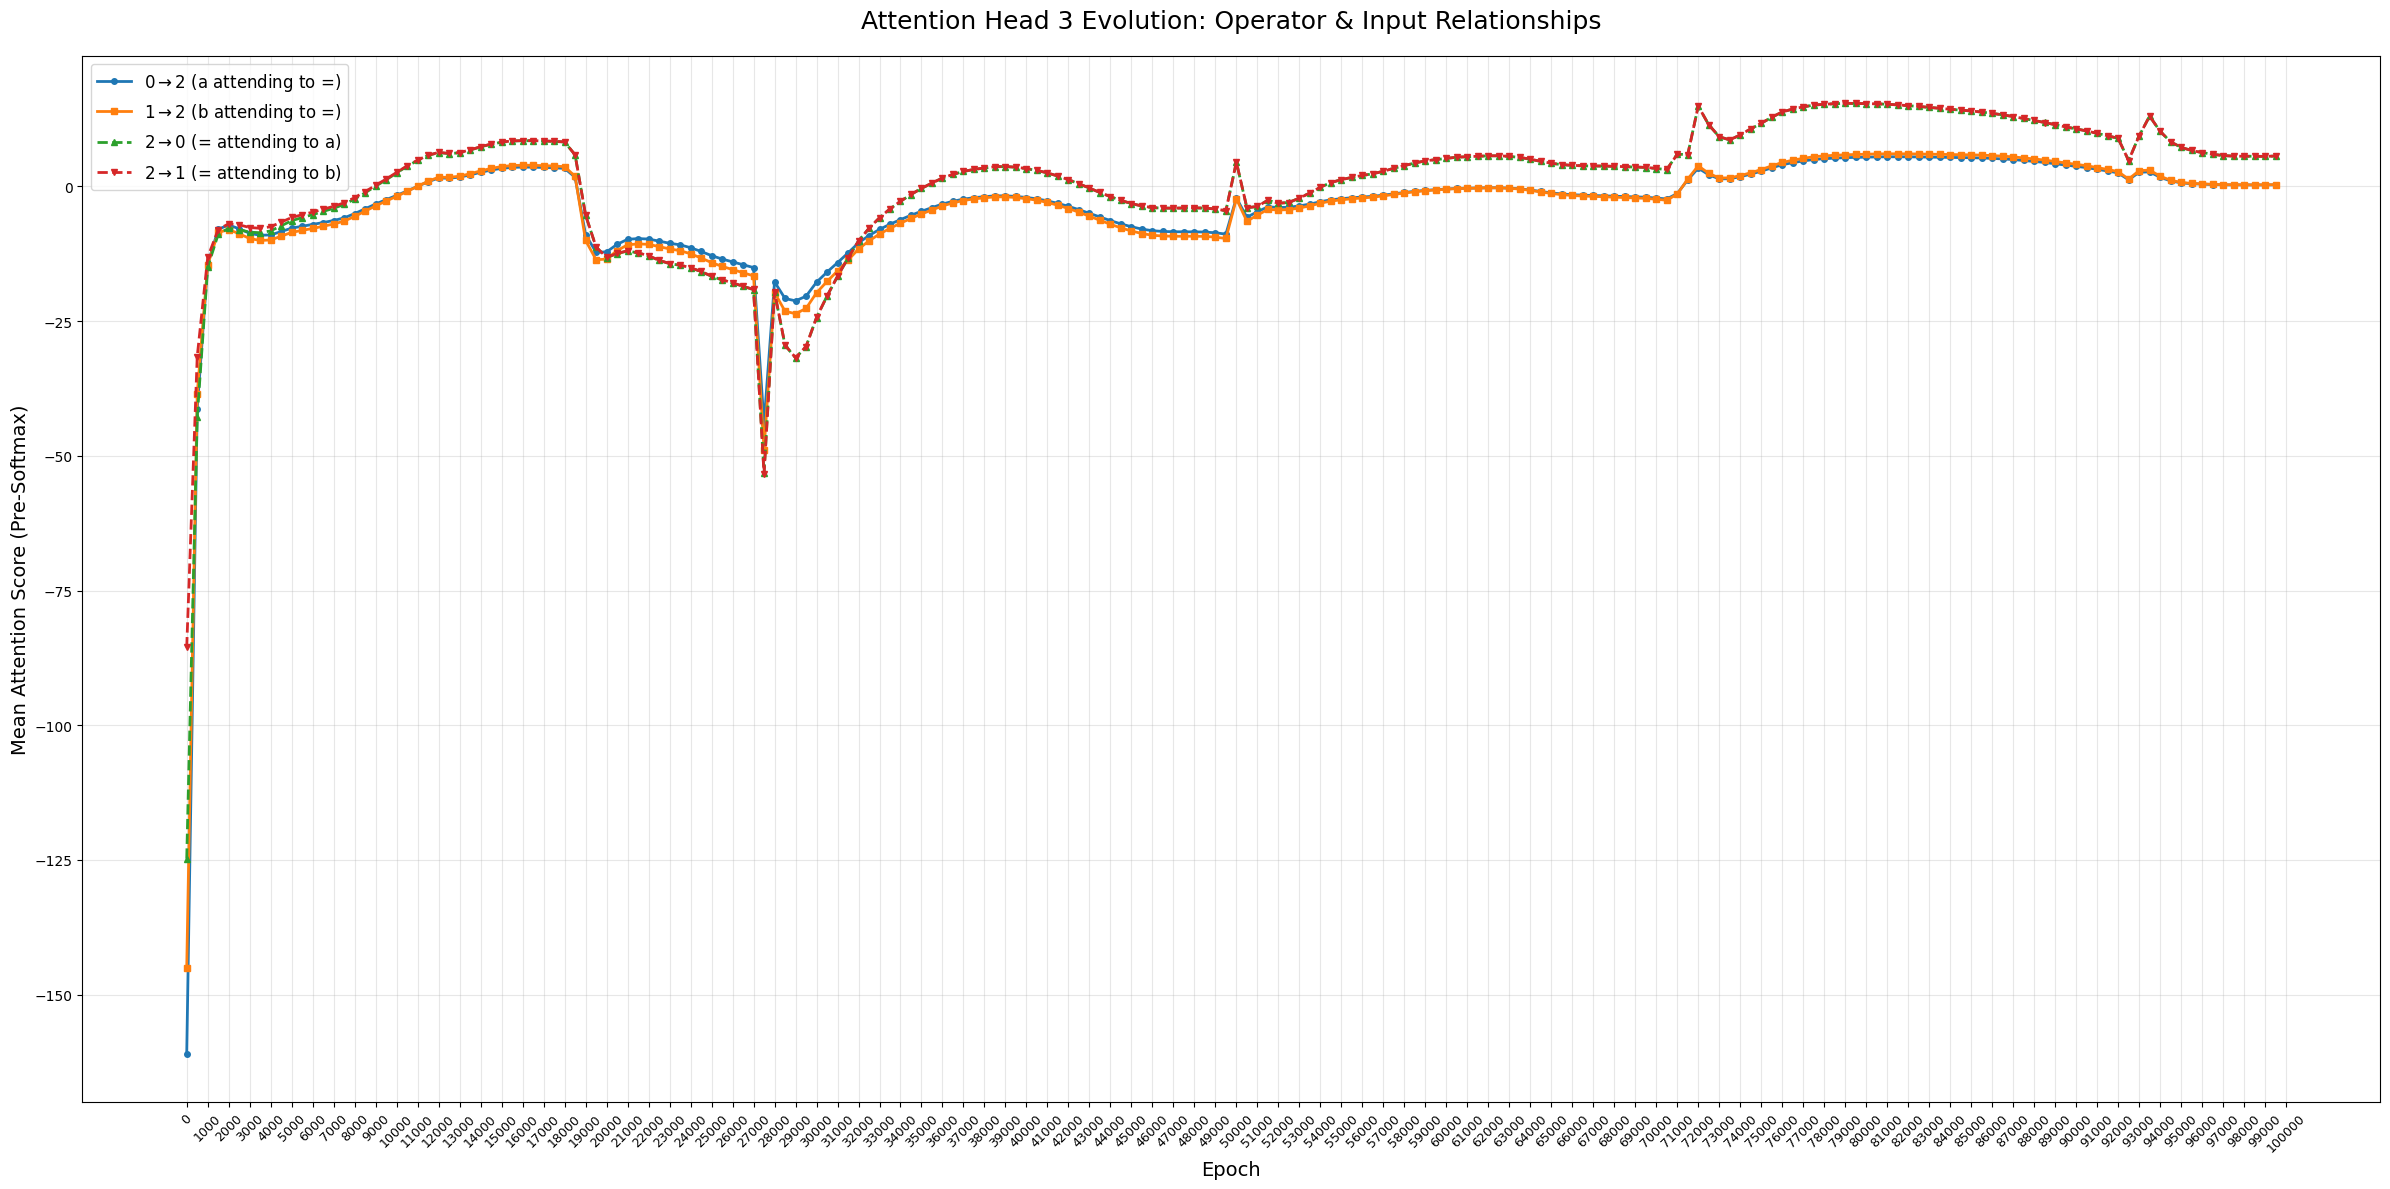

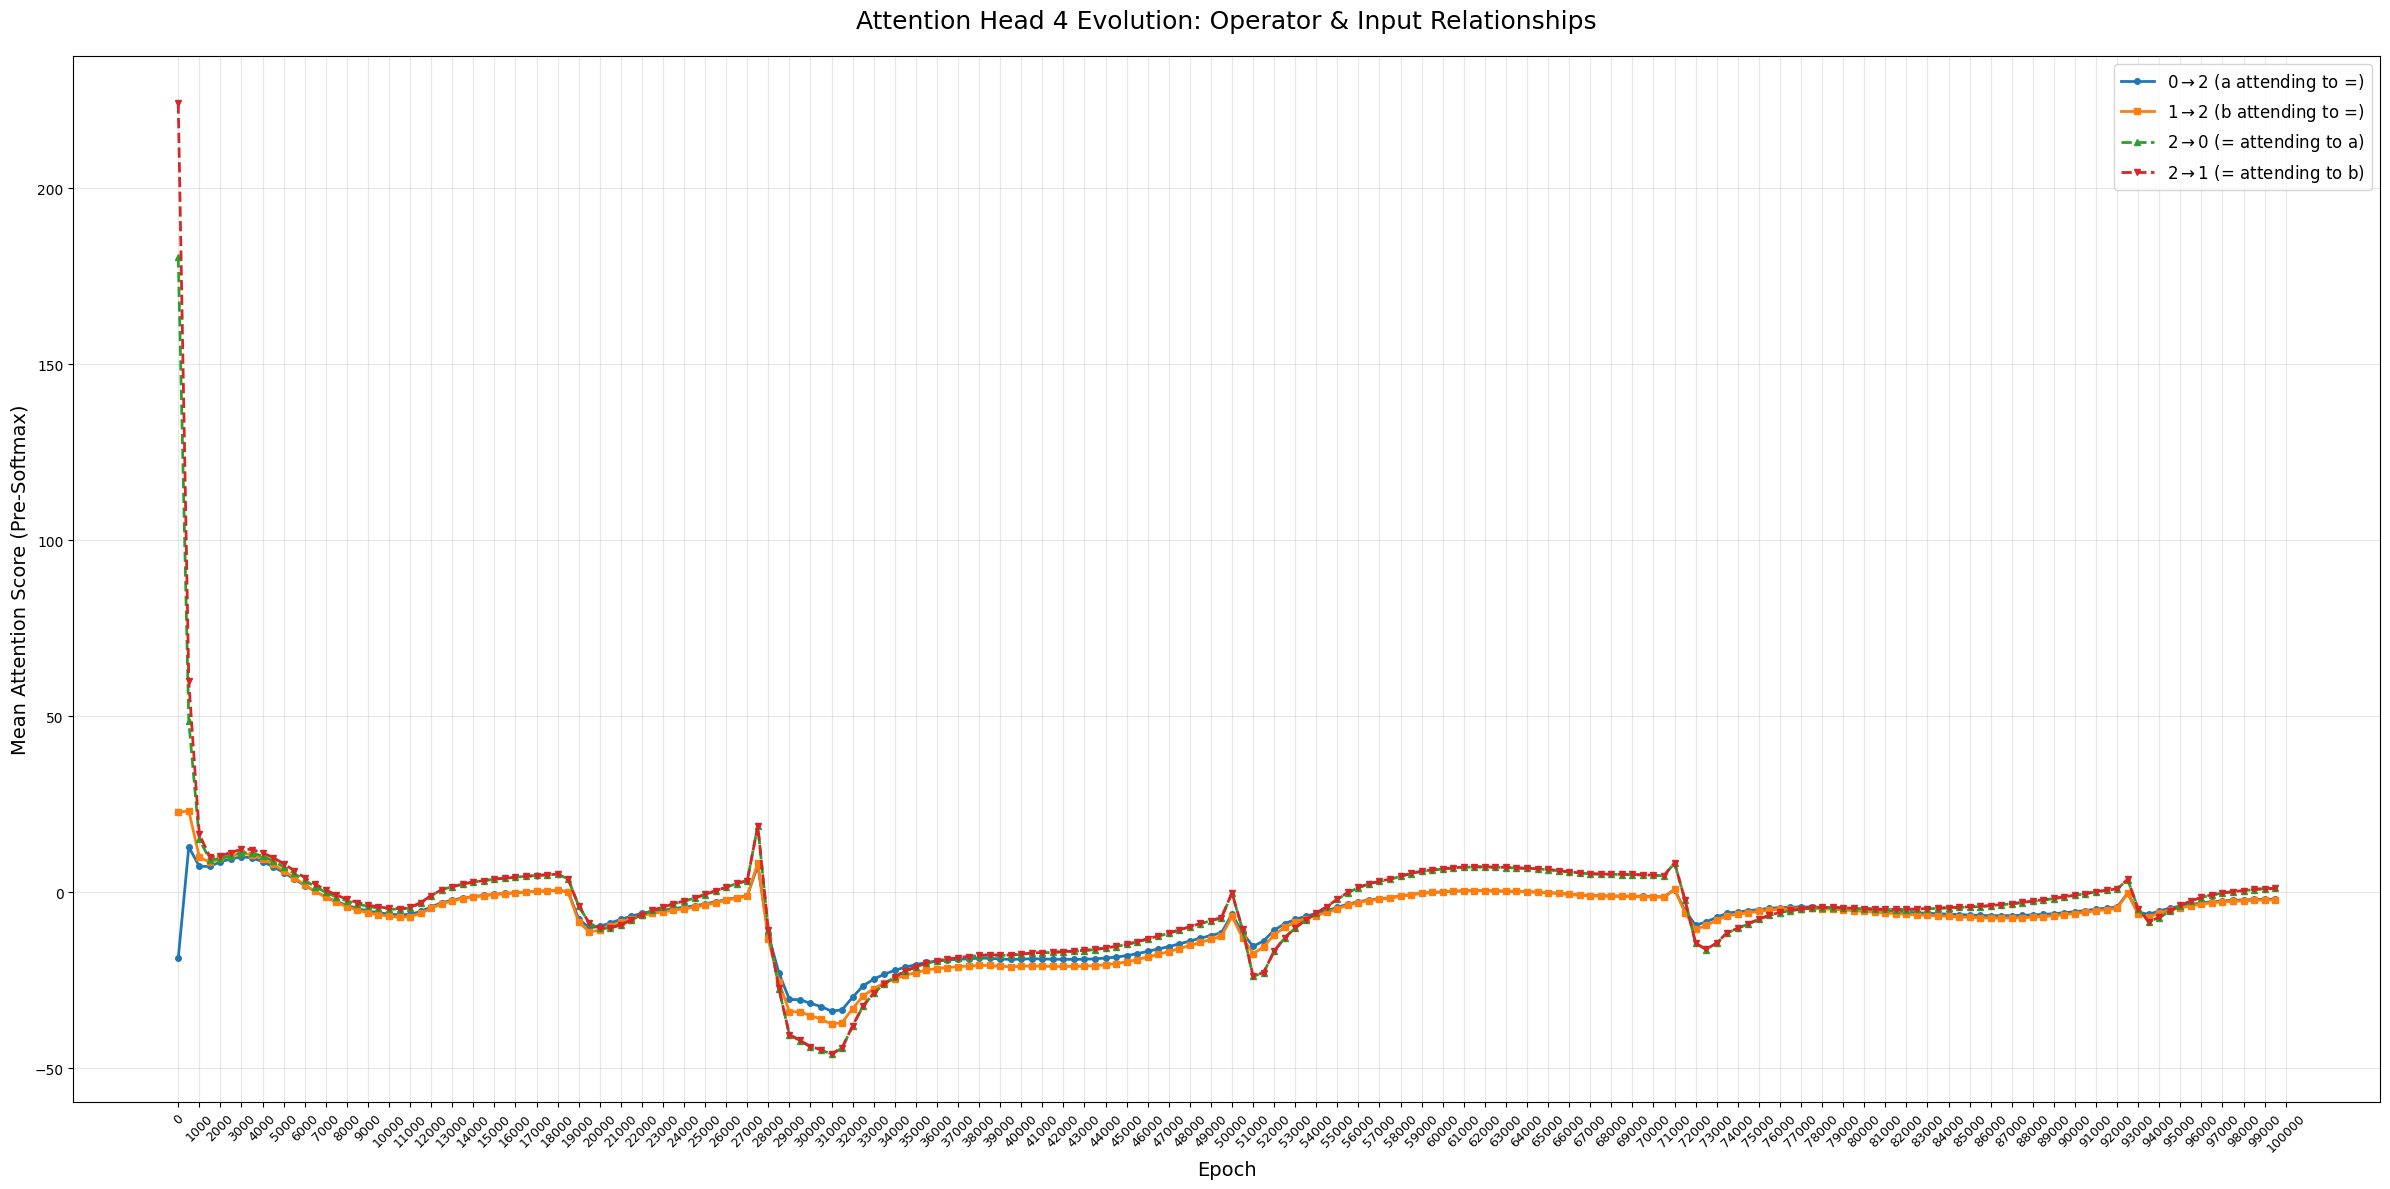

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# 1. Prepare the Data
epochs_recorded = np.arange(len(data)) * 500
num_heads = 4

# Initialize storage for the 4 requested relationships
# Indices: 0->2 (a to =), 1->2 (b to =), 2->0 (= to a), 2->1 (= to b)
att_02 = np.zeros((num_heads, len(data)))
att_12 = np.zeros((num_heads, len(data)))
att_20 = np.zeros((num_heads, len(data)))
att_21 = np.zeros((num_heads, len(data)))

for i, entry in enumerate(data):
    for h in range(num_heads):
        # Ensure we are working with a tensor for batch-wide indexing
        head_tensor = torch.as_tensor(entry['train_att'][h])
        
        # Calculate means across the batch for each directed relationship
        att_02[h, i] = head_tensor[:, 0, 2].mean().item()
        att_12[h, i] = head_tensor[:, 1, 2].mean().item()
        att_20[h, i] = head_tensor[:, 2, 0].mean().item()
        att_21[h, i] = head_tensor[:, 2, 1].mean().item()

# 2. Plotting parameters
tick_spacing = 1000
xticks = np.arange(0, 100001, tick_spacing)

# 3. Generate 4 separate large graphs (one per head)
for h in range(num_heads):
    fig, ax = plt.subplots(figsize=(24, 12))
    
    # Plotting the 4 directed lines with distinct styles
    ax.plot(epochs_recorded, att_02[h], label='$0 \\to 2$ (a attending to =)', 
            color='#1f77b4', linestyle='-', marker='o', markersize=4, linewidth=2)
    ax.plot(epochs_recorded, att_12[h], label='$1 \\to 2$ (b attending to =)', 
            color='#ff7f0e', linestyle='-', marker='s', markersize=4, linewidth=2)
    ax.plot(epochs_recorded, att_20[h], label='$2 \\to 0$ (= attending to a)', 
            color='#2ca02c', linestyle='--', marker='^', markersize=4, linewidth=2)
    ax.plot(epochs_recorded, att_21[h], label='$2 \\to 1$ (= attending to b)', 
            color='#d62728', linestyle='--', marker='v', markersize=4, linewidth=2)
    
    # Formatting
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, rotation=45, fontsize=9)
    ax.set_title(f'Attention Head {h+1} Evolution: Operator & Input Relationships', fontsize=18, pad=20)
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('Mean Attention Score (Pre-Softmax)', fontsize=14)
    ax.legend(fontsize=12, loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    # Save with a descriptive filename
    plt.savefig(f'head_{h+1}_operator_relationships_a_b_e_1.png', dpi=300, bbox_inches='tight')
    plt.show()